## Approximate Nearest Neighbour using Annoy  
https://pypi.org/project/annoy/  
Based on code from   
https://www.kaggle.com/nicw102168/nearest-neighbor-classification-with-annoy

In [1]:
import annoy
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from kNNAnnoy import kNNAnnoyClassifier
from sklearn.model_selection import train_test_split
import time
import statistics
from sklearn import metrics
import kNNDataLoader
import matplotlib.pyplot as plt

In [2]:
Name_arr, X_dir, y_dir = kNNDataLoader.data_loader()
Name_arr

['Credit', 'HTRU', 'Shuttle', 'Letter']

In [3]:
ds = 'Letter'
X_train, X_test, y_train, y_test = train_test_split(X_dir[ds], y_dir[ds], 
                                                    random_state=0, test_size=1/2)

In [4]:
ts = time.time()
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train, y_train)
y_dash = kNN.predict(X_test)
tkNN = time.time() - ts

In [5]:
print('kNN Time: ',tkNN)
acc = metrics.accuracy_score(y_test, y_dash)
print("Accuracy: {0:.2f}".format(acc)) 
confusion = metrics.confusion_matrix(y_test, y_dash)
#print("Confusion matrix:\n{}".format(confusion)) 

kNN Time:  2.6283369064331055
Accuracy: 0.93


## kNNAnnoyClassifier

### Defaults
metric = 'euclidean'
n_trees = 10
n_neighbors = 5


In [6]:
from kNNAnnoy import kNNAnnoyClassifier

In [7]:
ANN = kNNAnnoyClassifier(n_neighbors = 5, n_trees = 10)
ts = time.time()

ANN = ANN.fit(X_train, y_train)
y_hat = ANN.predict(X_test)

tf = time.time()

In [8]:
acc = metrics.accuracy_score(y_test, y_hat)
conf = metrics.confusion_matrix(y_test, y_hat)

print("AnnonykNN Time: {0:.2f}".format(tf-ts))
print("Accuracy: {0:.2f}".format(acc)) 
#print("Confusion matrix:\n{}".format(conf)) 

AnnonykNN Time: 0.64
Accuracy: 0.92


In [9]:
ANN.t

## ANN Accuracy Evaluation

In [10]:
ANN = kNNAnnoyClassifier(n_neighbors = 5, n_trees = 1)
kNN = KNeighborsClassifier(n_neighbors=5)

m_names = ['k-NN','ANN']
models = {'k-NN':kNN, 'ANN':ANN}

In [11]:
ANN_acc = {}
ANN_t = {}

for m_name in models:
    m = models[m_name]
    print(m_name)
    times = {}
    accs = {}
    for ds in Name_arr:
        print(ds)
        X = X_dir[ds]
        y = y_dir[ds]
        
        t_start = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X_dir[ds], y_dir[ds], 
                                                    random_state=0, test_size=1/2)
        Model = m.fit(X_train, y_train)
        y_hat = Model.predict(X_test)
 
        t = time.time()-t_start
        acc = metrics.accuracy_score(y_test, y_hat)

        times[ds]= t
        accs[ds]= acc
        print(t)
    ANN_acc[m_name]=accs
    ANN_t[m_name]=times

k-NN
Credit
12.471357107162476
HTRU
0.51981520652771
Shuttle
3.0626699924468994
Letter
1.9638431072235107
ANN
Credit
0.30876994132995605
HTRU
0.13580107688903809
Shuttle
0.5034849643707275
Letter
0.2763230800628662


In [12]:
ANN_acc

{'k-NN': {'Credit': 0.7900666666666667,
  'HTRU': 0.9793272991395686,
  'Shuttle': 0.9984365659631214,
  'Letter': 0.9281},
 'ANN': {'Credit': 0.7938,
  'HTRU': 0.9776511342049391,
  'Shuttle': 0.9971950154044236,
  'Letter': 0.7767}}

In [13]:
resA_pd = pd.DataFrame(ANN_acc)
rest_pd = pd.DataFrame(ANN_t)

In [14]:
resA_pd['Acc Percent']=resA_pd['ANN']/resA_pd['k-NN']*100
resA_pd['Time Percent']=rest_pd['ANN']/rest_pd['k-NN']*100
resA_pd

,k-NN,ANN,Acc Percent,Time Percent
Credit,0.790067,0.793800,100.472534,2.475833
HTRU,0.979327,0.977651,99.828845,26.124876
Shuttle,0.998437,0.997195,99.875651,16.439413
Letter,0.928100,0.776700,83.687103,14.070527


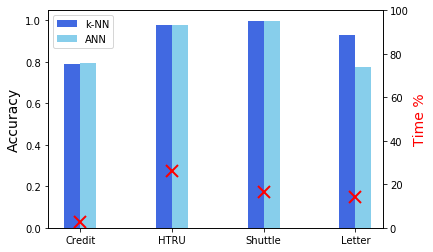

In [25]:

width = .35 # width of a bar

ax1=resA_pd[['k-NN','ANN']].plot(kind='bar', width = width, 
                                 figsize=(6,4),
                                 color = ('royalblue','skyblue'))
ax2=resA_pd['Time Percent'].plot(secondary_y=True, color = 'r', markersize=12, mew =2,
                                 marker = 'x', linewidth = 0)

plt.xlim([-width, 4-2*width])
ax2.set_ylim(0,100)
ax1.set_ylabel('Accuracy',fontsize = 14)
ax2.set_ylabel('Time %', color = 'r', fontsize = 14)

plt.show()

## Accuracy v No of Trees

In [26]:
TTrees = 10
nTrials = 5
ds = 'Letter'
X = X_dir[ds]
y = y_dir[ds]
X_train, X_test, y_train, y_test = train_test_split(X_dir[ds], y_dir[ds], 
                                                    random_state=0, test_size=1/2)
times = []
accs = []

t_max, a_max = (1.2825381755828857, 0.9281)
for nt in range(1, TTrees + 1):
    ANN = kNNAnnoyClassifier(n_neighbors = 5, n_trees = nt)
    tot = 0
    for tt in range(nTrials):
        t_start = time.time()
        Model = ANN.fit(X_train, y_train)
        y_hat = Model.predict(X_test)
        tot += (time.time()-t_start)
        acc = metrics.accuracy_score(y_test, y_hat)
    t_avg = tot/nTrials
    times.append(t_avg/t_max*100)   
    accs.append(acc/a_max*100)


In [27]:
df = pd.DataFrame(list(zip(times, accs)), index = range(1,TTrees + 1),
              columns =['Time', 'Accuracy']) 


In [28]:
df

,Time,Accuracy
1,12.815235,83.687103
2,13.013806,87.986208
3,14.950592,92.382286
4,17.082282,94.774270
5,18.278176,96.024135
6,20.216725,97.177028
7,23.418142,97.898933
8,25.132604,98.373020
9,27.775356,98.707036
10,27.784034,99.019502


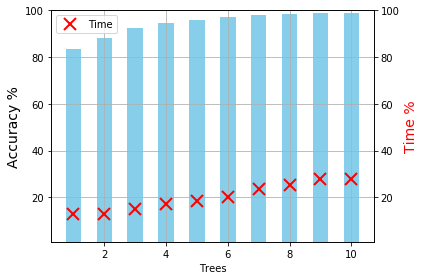

In [33]:
fig, ax1 = plt.subplots(figsize=(6,4))
r = range(1,11)
color = 'skyblue'
ax1.set_xlabel('Trees')
ax1.set_ylabel('Accuracy %', fontsize = 14 )
ax1.bar(r, df['Accuracy'], color=color, width = 0.5)
ax1.grid(which = 'major')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'r'
ax2.set_ylabel('Time %',color = 'r', fontsize = 14 )  # we already handled the x-label with ax1
ax2.plot(r, df['Time'], color=color, marker = 'x', markersize=12, mew =2,
                                  linewidth = 0)
ax2.set_ylim(1,100)
ax1.set_ylim(1,100)

ax2.legend(loc = 'upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()